<a href="https://colab.research.google.com/github/ilhamimutlu/GitHub-Projects/blob/main/ANN_Mini_project_(Customer_segmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

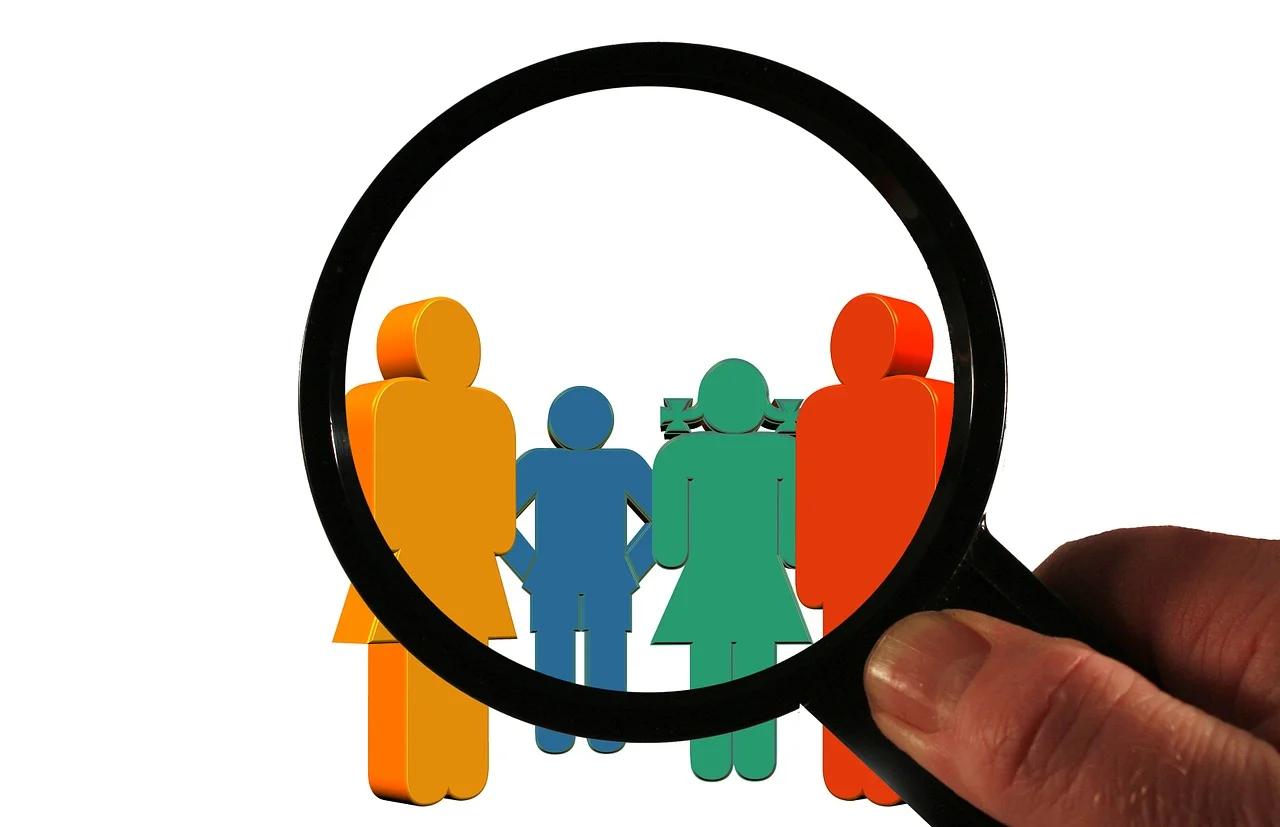

<span class="girk">We have a data set containing the details of a bank's customers. The aim will be to solve a multiclass classification problem using customers classes ['Good', 'Standard', 'Poor']. In this process, the model will be developed using different parameter adjustments and normalization processes.</span>

Churn analysis, in essence, is a method used to analyze and understand the rate at which customers are leaving a service or a product offering provided by a company. It's commonly employed to assess customer retention and develop strategies to reduce customer attrition.

Churn refers to the rate of customer loss within a specific period. Loss of customers can occur due to various reasons such as subscription cancellations, discontinuation of services, opting out of purchases, or switching to competitive alternatives. Churn analysis aims to comprehend the reasons behind these losses, identify the departing customers, and formulate strategies to minimize future attrition.

The process of churn analysis typically involves several steps:

1. Data Collection: Gathering relevant data from various sources such as customer transactions, interactions, purchase history, satisfaction surveys, etc.

2. Customer Segmentation: Analyzing the data to segment customers based on demographics, buying behaviors, geographic location, or other criteria.

3. Calculating Churn Rate: Determining the number of customers lost over a specific period, often expressed as a ratio per customer or as a percentage of the total customer base.

4. Identifying Churn Causes: Analyzing data to understand why customers are leaving. Factors such as pricing, quality of customer service, product satisfaction, competitive offerings, etc., are examined.

5. Examining Customer Behavior: Studying customer behavior like the date of last purchase, preferred products or services, etc., to understand the characteristics and actions of the leaving customers.

6. Developing Strategies to Reduce Churn: Based on the insights gained, creating strategies to mitigate customer attrition. These strategies could include improving customer satisfaction, offering special deals, implementing customer win-back programs, etc.

Churn analysis serves as a vital tool for companies to retain and grow their customer base. By employing data-driven insights, reducing customer losses can enhance profitability and fortify long-term success by fostering customer loyalty.

## Import  libraries & data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Score.csv")
df.head()
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
#"RowNumber" column is determined as index

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575


- **Delay_from_due_date**: Ödeme tarihinden gecikme süresi. Bir borcun vadesinden sonra ne kadar süre geçtiği.
- **Num_of_Delayed_Payment**: Gecikmiş ödemelerin sayısı.
- **Num_Credit_Inquiries**: Kredi başvurularının sayısı. Yeni kredi başvuruları veya kredi alımı için yapılan sorguların sayısı.
- **Credit_Utilization_Ratio**: Kredi kullanım oranı. Kredi limitine göre kullanılan kredi miktarının oranı.
- **Credit_History_Age**: Kredi geçmişinin yaşı. Kredi geçmişinin başlangıcından itibaren geçen süre.
- **Payment_of_Min_Amount**: Minimum ödeme tutarının ödenip ödenmediği.
- **Amount_invested_monthly**: Aylık olarak yatırılan miktar. Bu genellikle yatırım hesapları için kullanılır.
- **Monthly_Balance**: Aylık bakiye.
- **Credit_Score**: Kredi puanı. Kişinin kredi geçmişi ve kredi alışveriş geçmişi üzerinden elde edilen bir değer.
- **Credit_Mix**: Kredi karışımı. Farklı kredi türlerine (kredi kartları, ipotekler, öğrenci kredileri) sahip olma durumu.
- **Age**: Yaş.
- **Annual_Income**: Yıllık gelir.
- **Num_Bank_Accounts**: Banka hesaplarının sayısı.
- **Num_Credit_Card**: Kredi kartlarının sayısı.
- **Interest_Rate**: Faiz oranı.
- **Num_of_Loan**: Kredi sayısı.
- **Monthly_Inhand_Salary**: Elde edilen aylık net gelir.
- **Changed_Credit_Limit**: Değiştirilen kredi limiti.
- **Outstanding_Debt**: Ödenmemiş borç.
- **Total_EMI_per_month**: Ayda ödenen toplam eşit taksit miktarı.

Bu tür veriler genellikle kredi değerlendirmesi, finansal durum analizi veya kredi başvurusu süreçlerinde kullanılır. Ödeme alışkanlıkları, gelir durumu, kredi geçmişi ve borç durumu gibi faktörler, kişilerin kredi veya finansal ürünler için uygunluğunu belirlemede önemli olabilir.

- **Delay_from_due_date**: Time elapsed after the due date for payment. Indicates how long a debt payment has been overdue.
- **Num_of_Delayed_Payment**: Number of delayed payments. Represents the count of payments made after their due dates.
- **Num_Credit_Inquiries**: Count of credit inquiries. Reflects the number of times a person's credit report is accessed, often due to applying for new credit or loans.
- **Credit_Utilization_Ratio**: Ratio of credit used to credit available. It shows how much of the credit limit is being utilized.
- **Credit_History_Age**: Age of credit history. Measures the time since the credit history was established.
- **Payment_of_Min_Amount**: Whether the minimum payment amount has been paid.
- **Amount_invested_monthly**: Amount invested on a monthly basis, commonly used in investment accounts.
- **Monthly_Balance**: Balance at the end of each month.
- **Credit_Score**: Credit score. Derived from a person's credit history and credit application data, reflecting their creditworthiness.
- **Credit_Mix**: Diversity of credit. Indicates having different types of credit accounts, such as credit cards, mortgages, student loans, etc.
- **Age**: Age of the individual.
- **Annual_Income**: Annual income.
- **Num_Bank_Accounts**: Number of bank accounts.
- **Num_Credit_Card**: Number of credit cards.
- **Interest_Rate**: Interest rate.
- **Num_of_Loan**: Number of loans.
- **Monthly_Inhand_Salary**: Net monthly income.
- **Changed_Credit_Limit**: Adjusted credit limit.
- **Outstanding_Debt**: Remaining unpaid debt.
- **Total_EMI_per_month**: Total Equated Monthly Installment (EMI) paid per month.

These types of data are commonly used in credit assessment, financial situation analysis, or during credit application processes. Factors like payment habits, income status, credit history, and debt situation can be crucial in determining an individual's suitability for credit or financial products.

![churn.JPG](attachment:churn.JPG)

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [5]:
df.shape

(99960, 21)

In [6]:
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,99960.000,21.096,14.827,0.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,99960.000,13.336,6.270,0.000,9.000,14.000,18.000,28.000
Num_Credit_Inquiries,99960.000,5.775,3.862,0.000,3.000,5.000,8.000,29.000
Credit_Utilization_Ratio,99960.000,32.285,5.117,20.000,28.052,32.305,36.496,50.000
Credit_History_Age,99960.000,221.123,99.696,1.000,144.000,219.000,302.000,404.000
Amount_invested_monthly,99960.000,193.665,194.783,0.000,73.709,129.342,234.324,1977.326
Monthly_Balance,99960.000,403.445,214.387,0.008,270.317,337.238,471.905,1602.041
Age,99960.000,33.269,10.762,14.000,24.000,33.000,42.000,56.000
Annual_Income,99960.000,50498.704,38294.243,7005.930,19338.480,36996.830,71681.400,179987.280
Num_Bank_Accounts,99960.000,5.369,2.592,0.000,3.000,5.000,7.000,10.000


In [9]:
df1=df[["Credit_Mix","Credit_Score"]]
df1

,Credit_Mix,Credit_Score
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Good,Good
...,...,...
99955,Good,Poor
99956,Good,Poor
99957,Good,Poor
99958,Good,Standard


In [10]:
df.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [11]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [12]:
df. Payment_Behaviour.unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [13]:
df.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      33912
High_spent_Medium_value_payments    26728
High_spent_Large_value_payments     16744
Low_spent_Medium_value_payments     10304
High_spent_Small_value_payments      6512
Low_spent_Large_value_payments       5760
Name: Payment_Behaviour, dtype: int64

In [14]:
df.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

"The term 'NM' most likely stands for 'Not Mentioned' or 'Not Measured.' Such an expression indicates that a specific criterion related to payments or financial transactions has not been specified or measured. These situations often reflect a lack of information, uncertainty, or cases where a particular condition has not been evaluated. For this reason, I have decided to exclude the rows with 'NM'."

In [15]:
df = df[df['Payment_of_Min_Amount'] != 'NM']

In [16]:
df.Payment_of_Min_Amount.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35628
Name: Payment_of_Min_Amount, dtype: int64

In [18]:
# Label Encoding işlemi özel duruma göre
label_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}

df['Credit_Mix'] = df['Credit_Mix'].map(label_mapping)


In [19]:
# Label Encoding işlemi özel duruma göre
label_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score'] = df['Credit_Score'].map(label_mapping)

In [20]:
## df3=df[["Credit_Mix","Credit_Score"]]
## df3

In [21]:
# Karşılıklı benzer değerleri bul
## mutual_similar_values = sum(df['Credit_Score'] == df['Credit_Mix'])

# Yüzdeyi hesapla
## total_values = len(df)
## percentage_similar = (mutual_similar_values / total_values) * 100

# Sonucu göster
## print(f"Karşılıklı benzer değer yüzdesi: {percentage_similar:.2f}%")



In [22]:
df_encoded = pd.get_dummies(df['Payment_of_Min_Amount'], prefix='Payment', drop_first=True)

# Yeni sütunları asıl veri çerçevesine ekleyin
df = pd.concat([df, df_encoded], axis=1)

# 'Payment_of_Min_Amount' sütununu orijinal veri çerçevesinden kaldırın
df = df.drop('Payment_of_Min_Amount', axis=1)

In [23]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,Payment_Behaviour,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Payment_Yes
0,3.000,7.000,4.000,26.823,265.000,80.415,312.494,2,2,High_spent_Medium_value_payments,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,0
1,3.000,7.000,4.000,31.945,265.000,118.280,284.629,2,2,High_spent_Medium_value_payments,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,0
2,3.000,7.000,4.000,28.609,267.000,81.700,331.210,2,2,High_spent_Medium_value_payments,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,0
3,5.000,4.000,4.000,31.378,268.000,199.458,223.451,2,2,High_spent_Medium_value_payments,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,0
4,6.000,4.000,4.000,24.797,269.000,41.420,341.489,2,2,High_spent_Medium_value_payments,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,0


In [24]:
# 'Payment_Behaviour' sütununu one-hot encoding ile dönüştür
df_encoded = pd.get_dummies(df['Payment_Behaviour'], prefix='Behaviour', drop_first=False)

# Yeni sütunları asıl veri çerçevesine ekleyin
df = pd.concat([df, df_encoded], axis=1)

# 'Payment_Behaviour' sütununu orijinal veri çerçevesinden kaldırın
df = df.drop('Payment_Behaviour', axis=1)


In [25]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,Age,...,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Payment_Yes,Behaviour_High_spent_Large_value_payments,Behaviour_High_spent_Medium_value_payments,Behaviour_High_spent_Small_value_payments,Behaviour_Low_spent_Large_value_payments,Behaviour_Low_spent_Medium_value_payments,Behaviour_Low_spent_Small_value_payments
0,3.000,7.000,4.000,26.823,265.000,80.415,312.494,2,2,23.000,...,11.270,809.980,49.575,0,0,1,0,0,0,0
1,3.000,7.000,4.000,31.945,265.000,118.280,284.629,2,2,23.000,...,11.270,809.980,49.575,0,0,1,0,0,0,0
2,3.000,7.000,4.000,28.609,267.000,81.700,331.210,2,2,23.000,...,11.270,809.980,49.575,0,0,1,0,0,0,0
3,5.000,4.000,4.000,31.378,268.000,199.458,223.451,2,2,23.000,...,11.270,809.980,49.575,0,0,1,0,0,0,0
4,6.000,4.000,4.000,24.797,269.000,41.420,341.489,2,2,23.000,...,11.270,809.980,49.575,0,0,1,0,0,0,0


In [26]:
columns_list = df.columns

# Sonuçları göster
print("Sütun Adları:", columns_list)

Sütun Adları: Index(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Credit_Mix', 'Age', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Total_EMI_per_month', 'Payment_Yes',
       'Behaviour_High_spent_Large_value_payments',
       'Behaviour_High_spent_Medium_value_payments',
       'Behaviour_High_spent_Small_value_payments',
       'Behaviour_Low_spent_Large_value_payments',
       'Behaviour_Low_spent_Medium_value_payments',
       'Behaviour_Low_spent_Small_value_payments'],
      dtype='object')


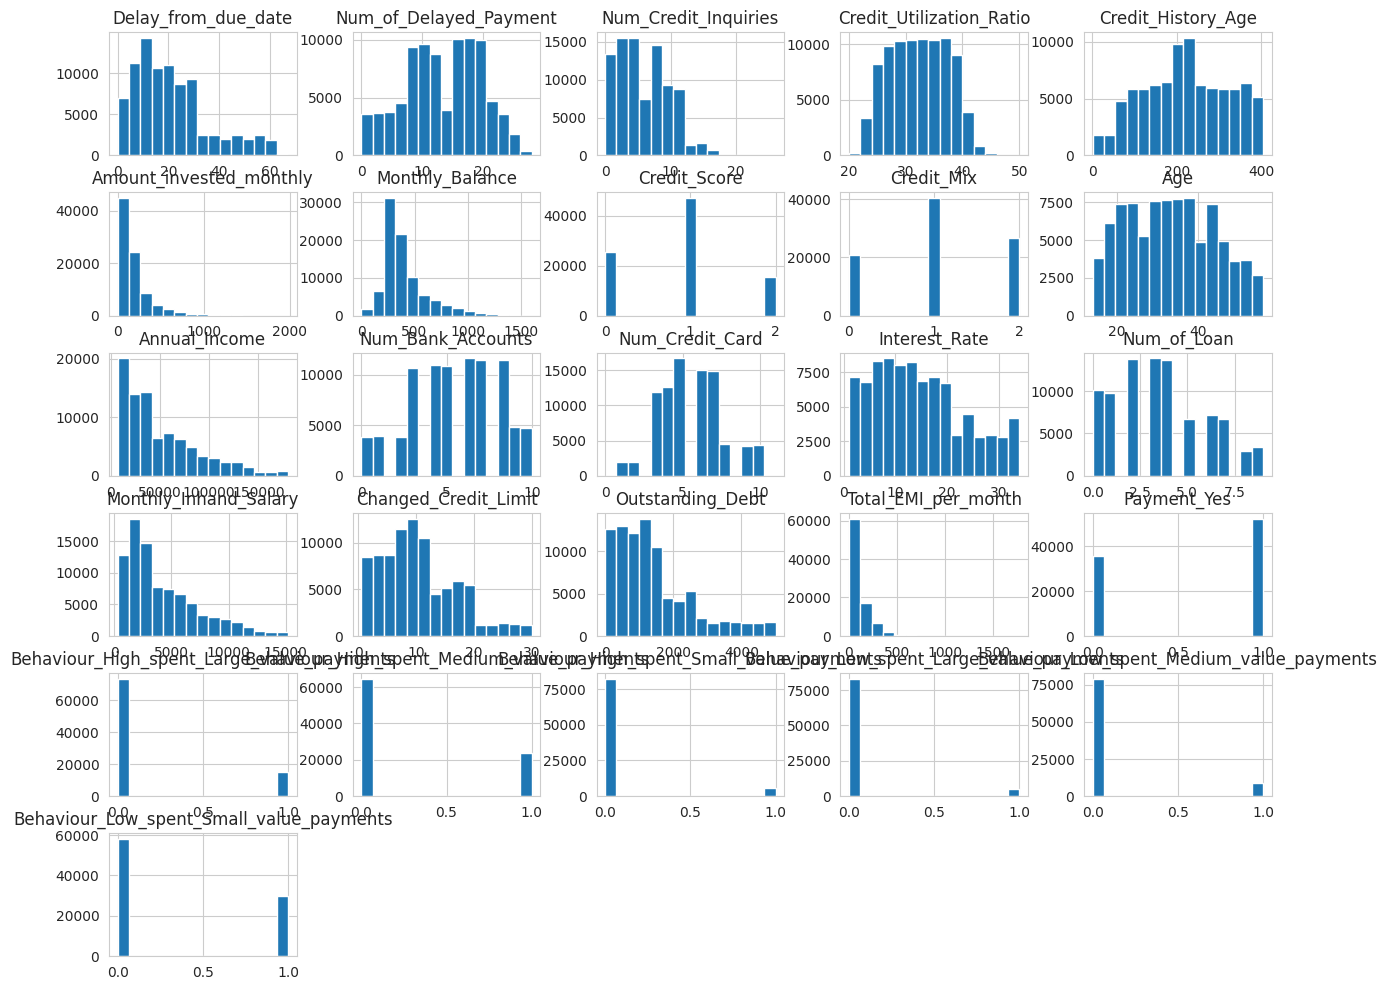

In [27]:
df.hist(figsize=(15, 12), bins=15);

<Axes: >

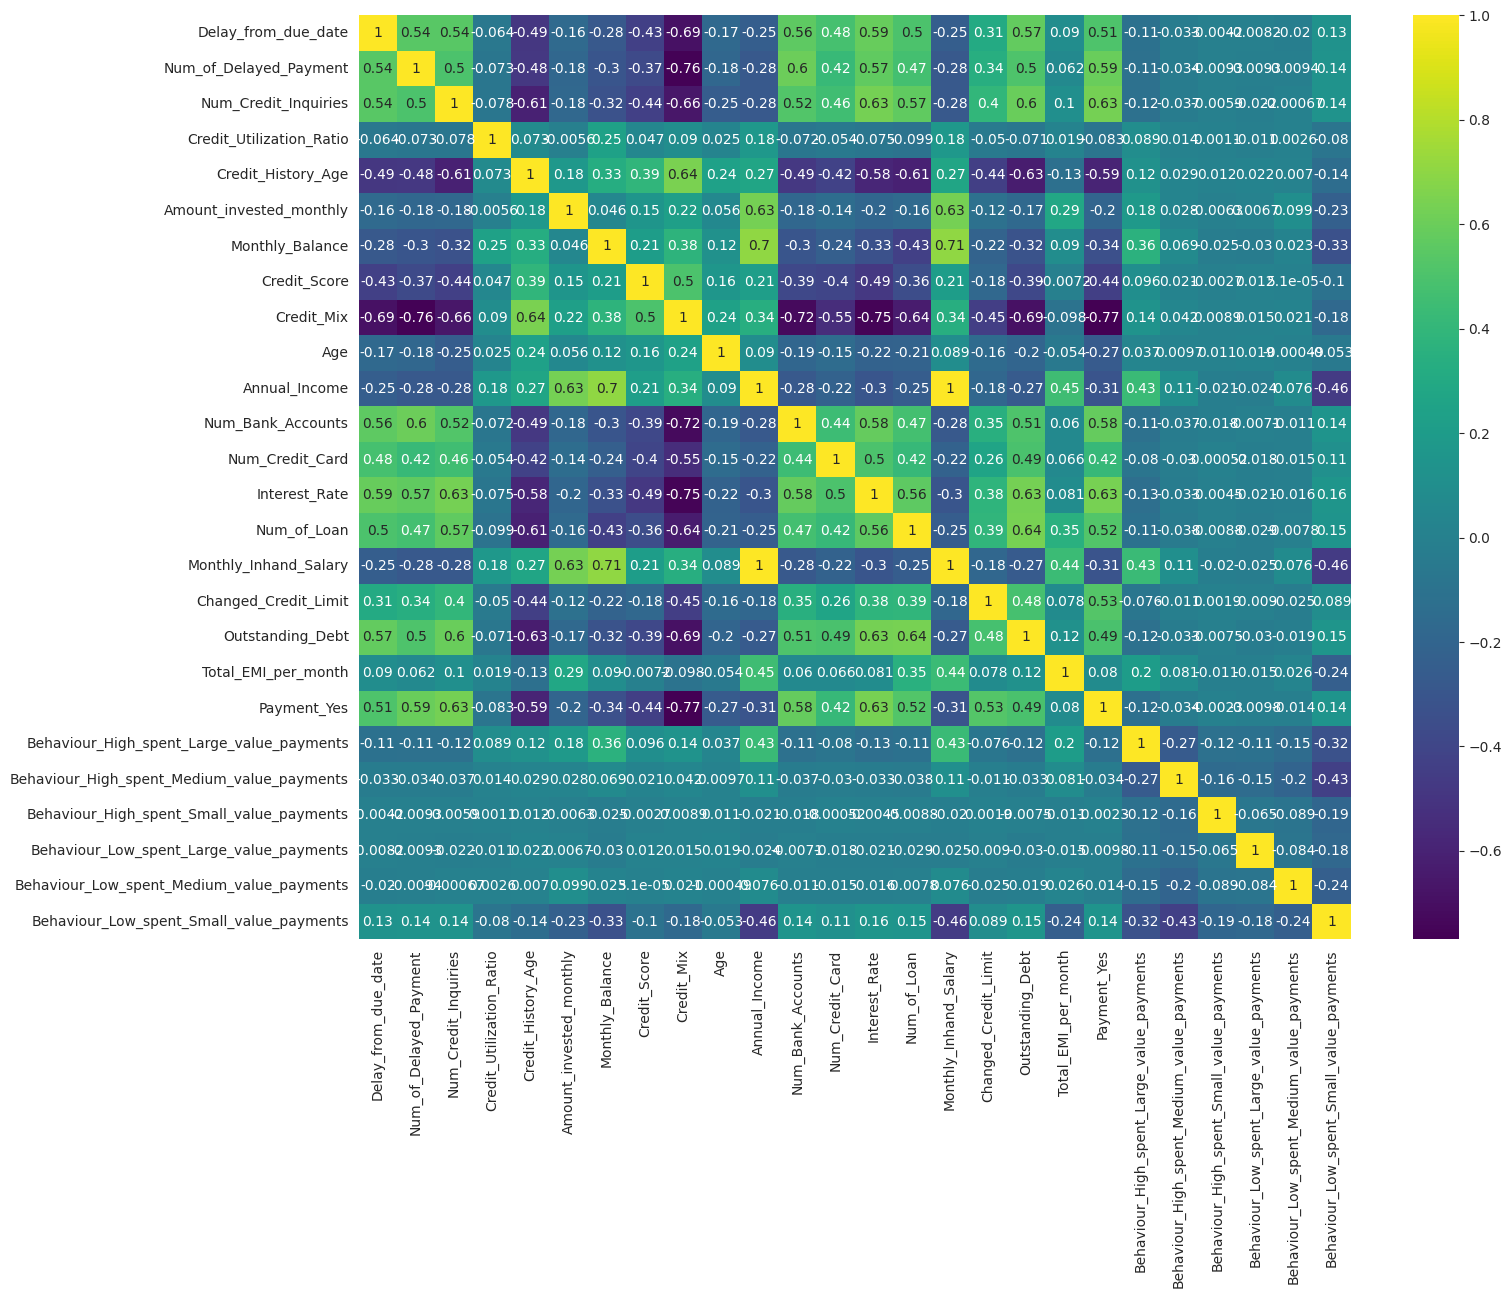

In [28]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

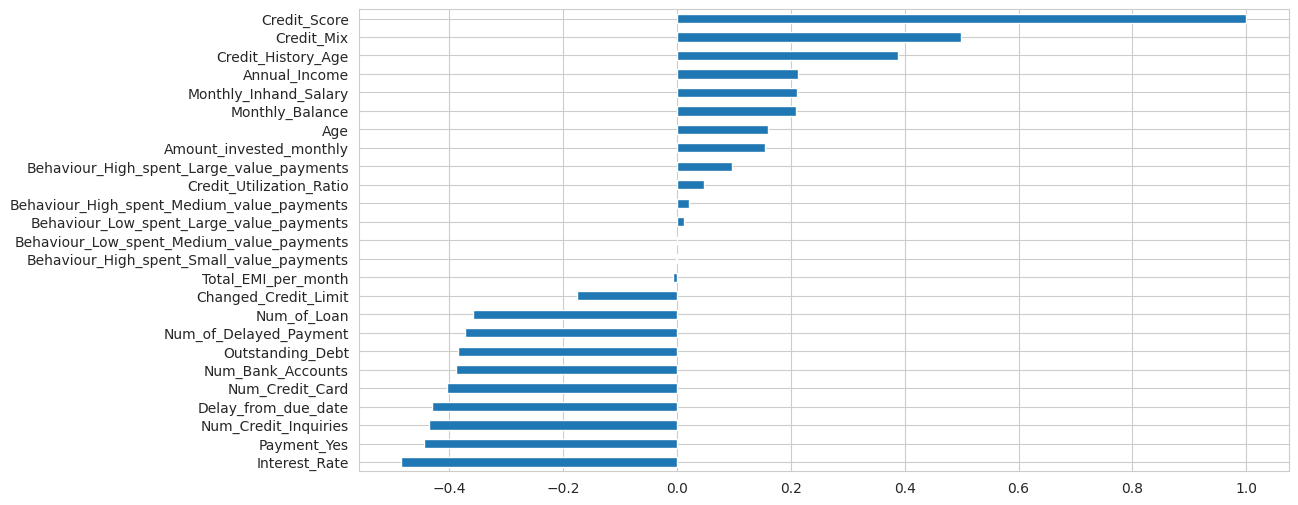

In [29]:
# Korelasyon matrisini oluşturma
corr_matrix = df.corr()

# 'Credit_Score' hariç diğer sütunların korelasyonunu inceleme
corr_without_credit_score = corr_matrix["Credit_Score"][:-1]
corr_without_credit_score.sort_values().plot.barh()
plt.show()


![data%20preprocessing.png](attachment:data%20preprocessing.png)

## Preprocessing of Data

### without class_weigth

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

In [31]:
from tensorflow.keras.optimizers import Adam

In [34]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [35]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [36]:
from keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [38]:
# Define custom F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight('true_positives', initializer='zeros')
        self.false_positives = self.add_weight('false_positives', initializer='zeros')
        self.false_negatives = self.add_weight('false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = K.cast(y_true, dtype=tf.float32)
        y_pred = K.cast(K.round(y_pred), dtype=tf.float32)

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        false_positives = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
        false_negatives = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())

        f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        return f1

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Precision, Recall
import tensorflow as tf
from keras.utils import to_categorical
from keras import backend as K

In [40]:
# We have 3 classes. We will use F1 score as our metric.




# Model architecture
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(128, activation="relu", input_dim=input_dimension))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model with the custom F1 score metric
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])

from keras.utils import to_categorical

# Assuming y_train is your original target labels
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

# Fit the model
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.2,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=early_stop)

Epoch 1/500
1979/1979 [==============================] - 14s 5ms/step - loss: 13.2055 - f1_score: 0.4529 - val_loss: 1.1317 - val_f1_score: 0.5923
Epoch 2/500
1979/1979 [==============================] - 10s 5ms/step - loss: 1.4876 - f1_score: 0.4645 - val_loss: 0.9743 - val_f1_score: 0.2517
Epoch 3/500
1979/1979 [==============================] - 9s 4ms/step - loss: 1.1021 - f1_score: 0.5311 - val_loss: 0.8863 - val_f1_score: 0.5592
Epoch 4/500
1979/1979 [==============================] - 10s 5ms/step - loss: 0.9518 - f1_score: 0.5263 - val_loss: 0.9910 - val_f1_score: 0.5568
Epoch 5/500
1979/1979 [==============================] - 10s 5ms/step - loss: 0.9833 - f1_score: 0.5317 - val_loss: 0.9982 - val_f1_score: 0.5354
Epoch 6/500
1979/1979 [==============================] - 8s 4ms/step - loss: 1.0017 - f1_score: 0.5328 - val_loss: 0.9980 - val_f1_score: 0.5354
Epoch 7/500
1979/1979 [==============================] - 10s 5ms/step - loss: 1.0018 - f1_score: 0.5328 - val_loss: 0.9979 - 

In [41]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weights))

In [42]:
class_weight

{0: 1.151070976748244, 1: 0.6250384934265072, 2: 1.8820256776034237}

In [43]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [44]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=200,
          verbose=1,
          #callbacks=early_stop,
          class_weight=None)

Epoch 1/200
2227/2227 [==============================] - 17s 7ms/step - loss: 0.8538 - f1_score: 0.5655 - val_loss: 0.8644 - val_f1_score: 0.5349
Epoch 2/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.7900 - f1_score: 0.6037 - val_loss: 1.0555 - val_f1_score: 0.6100
Epoch 3/200
2227/2227 [==============================] - 15s 7ms/step - loss: 0.7740 - f1_score: 0.6142 - val_loss: 1.0978 - val_f1_score: 0.5284
Epoch 4/200
2227/2227 [==============================] - 15s 7ms/step - loss: 0.7673 - f1_score: 0.6170 - val_loss: 0.7983 - val_f1_score: 0.6149
Epoch 5/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.7608 - f1_score: 0.6226 - val_loss: 0.9395 - val_f1_score: 0.5713
Epoch 6/200
2227/2227 [==============================] - 15s 7ms/step - loss: 0.7541 - f1_score: 0.6267 - val_loss: 0.7601 - val_f1_score: 0.6333
Epoch 7/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.7461 - f1_score: 0.6329 - val_loss: 0.7871 -

In [45]:
## Scaling Data

### Scaling Data

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [47]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [48]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=200,
          verbose=1,

          class_weight=None)

Epoch 1/200
2227/2227 [==============================] - 17s 7ms/step - loss: 0.7715 - f1_score: 0.6352 - val_loss: 0.6911 - val_f1_score: 0.6794
Epoch 2/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.7023 - f1_score: 0.6697 - val_loss: 0.6720 - val_f1_score: 0.6875
Epoch 3/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6868 - f1_score: 0.6805 - val_loss: 0.6719 - val_f1_score: 0.6934
Epoch 4/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6780 - f1_score: 0.6850 - val_loss: 0.6644 - val_f1_score: 0.6928
Epoch 5/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6694 - f1_score: 0.6896 - val_loss: 0.6621 - val_f1_score: 0.6904
Epoch 6/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6619 - f1_score: 0.6946 - val_loss: 0.6537 - val_f1_score: 0.6934
Epoch 7/200
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6547 - f1_score: 0.6991 - val_loss: 0.6516 -

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)
y_pred = y_pred.astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

275/275 [==============================] - 2s 5ms/step
[[2168  369   10]
 [ 681 3590  420]
 [  16  331 1211]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      2547
           1       0.84      0.77      0.80      4691
           2       0.74      0.78      0.76      1558

    accuracy                           0.79      8796
   macro avg       0.78      0.80      0.79      8796
weighted avg       0.80      0.79      0.79      8796



In [51]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [52]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=128,
          epochs=200,
          verbose=1,

          class_weight=None)

Epoch 1/200
557/557 [==============================] - 5s 7ms/step - loss: 0.7762 - f1_score: 0.6405 - val_loss: 0.7027 - val_f1_score: 0.6742
Epoch 2/200
557/557 [==============================] - 4s 6ms/step - loss: 0.6831 - f1_score: 0.6872 - val_loss: 0.6839 - val_f1_score: 0.6812
Epoch 3/200
557/557 [==============================] - 4s 8ms/step - loss: 0.6659 - f1_score: 0.6978 - val_loss: 0.6699 - val_f1_score: 0.6929
Epoch 4/200
557/557 [==============================] - 3s 6ms/step - loss: 0.6533 - f1_score: 0.7025 - val_loss: 0.6658 - val_f1_score: 0.7004
Epoch 5/200
557/557 [==============================] - 3s 6ms/step - loss: 0.6413 - f1_score: 0.7092 - val_loss: 0.6585 - val_f1_score: 0.7035
Epoch 6/200
557/557 [==============================] - 4s 6ms/step - loss: 0.6317 - f1_score: 0.7153 - val_loss: 0.6490 - val_f1_score: 0.7118
Epoch 7/200
557/557 [==============================] - 4s 8ms/step - loss: 0.6212 - f1_score: 0.7207 - val_loss: 0.6478 - val_f1_score: 0.7113

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)
y_pred = y_pred.astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

275/275 [==============================] - 1s 4ms/step
[[2052  480   15]
 [ 649 3623  419]
 [  15  431 1112]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2547
           1       0.80      0.77      0.79      4691
           2       0.72      0.71      0.72      1558

    accuracy                           0.77      8796
   macro avg       0.76      0.76      0.76      8796
weighted avg       0.77      0.77      0.77      8796



In [54]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [55]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=300,
          verbose=1,

          class_weight=None)

Epoch 1/300
2227/2227 [==============================] - 16s 7ms/step - loss: 0.7668 - f1_score: 0.6377 - val_loss: 0.6900 - val_f1_score: 0.6795
Epoch 2/300
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6999 - f1_score: 0.6747 - val_loss: 0.6735 - val_f1_score: 0.6864
Epoch 3/300
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6873 - f1_score: 0.6804 - val_loss: 0.6656 - val_f1_score: 0.6920
Epoch 4/300
2227/2227 [==============================] - 15s 7ms/step - loss: 0.6773 - f1_score: 0.6867 - val_loss: 0.6598 - val_f1_score: 0.7011
Epoch 5/300
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6697 - f1_score: 0.6891 - val_loss: 0.6595 - val_f1_score: 0.7053
Epoch 6/300
2227/2227 [==============================] - 15s 7ms/step - loss: 0.6618 - f1_score: 0.6965 - val_loss: 0.6667 - val_f1_score: 0.6878
Epoch 7/300
2227/2227 [==============================] - 14s 6ms/step - loss: 0.6567 - f1_score: 0.6998 - val_loss: 0.6510 -

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)
y_pred = y_pred.astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

275/275 [==============================] - 1s 3ms/step
[[2194  347    6]
 [ 717 3534  440]
 [   5  352 1201]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2547
           1       0.83      0.75      0.79      4691
           2       0.73      0.77      0.75      1558

    accuracy                           0.79      8796
   macro avg       0.77      0.80      0.78      8796
weighted avg       0.79      0.79      0.79      8796



## Final Model and Model Deployment

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=300,
          verbose=1,

          class_weight=None)